In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [4]:
@staticmethod
def factor(df, lookback=30):
    '''
    基于Hurst指数的市场分形维度计算
    识别市场的均值回归/趋势持续特性
    '''
    from numpy import cumsum, log, polyfit, sqrt, std, subtract
    
    def hurst(ts):
        """计算Hurst指数"""
        lags = range(2, 20)
        tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
        poly = polyfit(log(lags), log(tau), 1)
        return poly[0]*2.0
    
    hurst_values = df['close'].rolling(lookback).apply(
        lambda x: hurst(x.values), raw=False
    )
    fractal_dimension = 2 - hurst_values
    return fractal_dimension

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.003483
   Rank_IC (Spearman): 0.002209
📊 信息比率:
   IR: -0.212390
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 131006
   因子列: factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


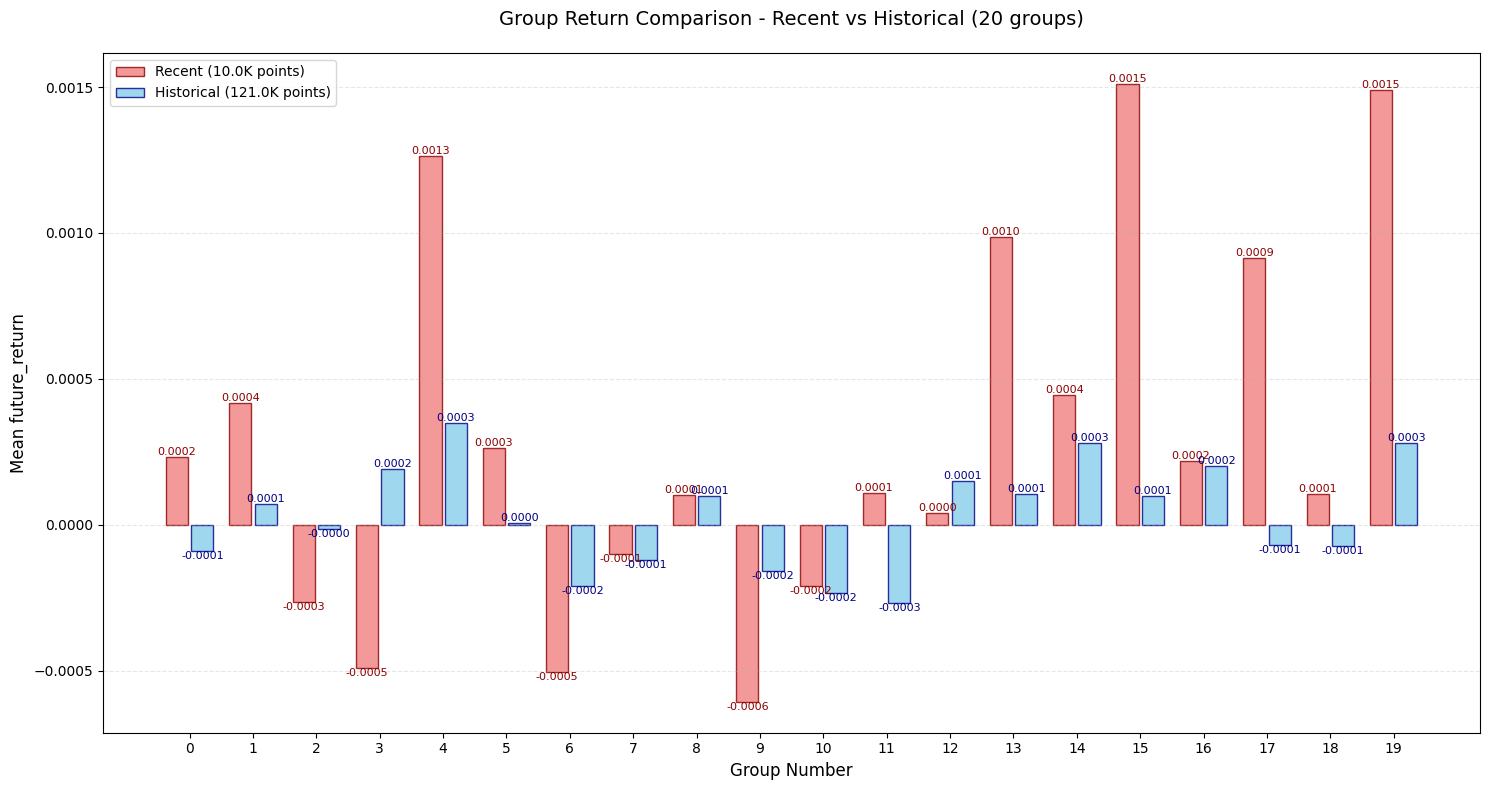

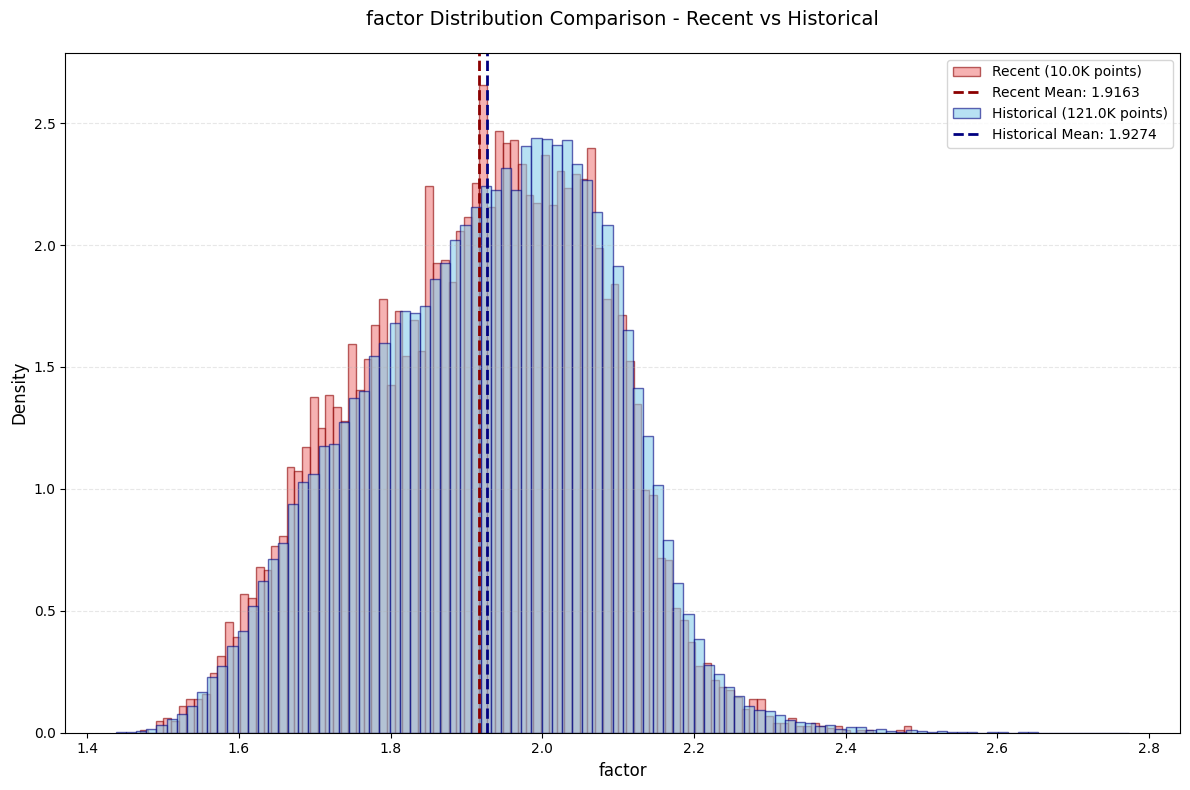

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [5]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

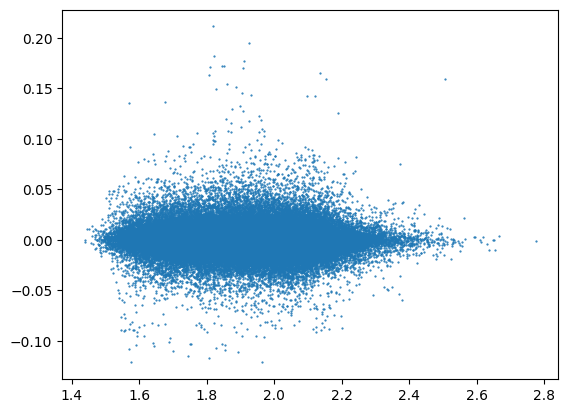

In [6]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [7]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[0.013374718897785277,
 0.010776860964759554,
 -0.019081358789963674,
 0.004374115115179117,
 -0.008364493203325815,
 -0.01642639143857413,
 0.006672991789598699,
 -0.006470005717930555,
 -0.012836972084914727,
 0.004397235794949307]

In [8]:
print(result)

{'correlation_analysis': {'IC': 0.0034825284742044634, 'Rank_IC': 0.002208559889522353}, 'information_ratio': {'IR': -0.21238957443267018, 'group_correlations': [0.013374718897785277, 0.010776860964759554, -0.019081358789963674, 0.004374115115179117, -0.008364493203325815, -0.01642639143857413, 0.006672991789598699, -0.006470005717930555, -0.012836972084914727, 0.004397235794949307], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0       1.4381   1.6538    1.6056      -0.0001      0.0138   6551
1       1.6538   1.7054    1.6813       0.0001      0.0125   6550
2       1.7054   1.7462    1.7263      -0.0000      0.0115   6550
3       1.7462   1.7809    1.7640       0.0002      0.0117   6551
4       1.7809   1.8118    1.7966       0.0004      0.0118   6550
5       1.8118   1.8408    1.8263       0.0000      0.0121   6550
6       1.8408   1.8681    1.8547 